In [1]:
%matplotlib inline
# %matplotlib notebook


import math as m
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

yellow='#ffb200'
red='#DD5544'
blue='#0284C0'

In [2]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [27]:
folder = r'C:\SPRUP_data_Jenda\light_sources\2020_11_14_HeNe/'.replace('\\', '/')

name = 'intensity_frequency_stabilized_expanded'

In [28]:
with open(folder + name +'.txt') as f:
    loadfile = f.read()
    data = []
for lf in loadfile.split('\n')[:-1]:
    row = [float(j) for j in lf.split('\t')]
    data.append([row[0]] + row[1::2])

data = np.matrix(data)

with open(folder + name +'Log.txt') as f:
    loadfile = f.read()
    columns = [lf[11:-6] for lf in loadfile.split('\n')[:-1]]
    columns = ['wavelength [nm]']+ columns[1::2]

In [29]:
print(data.shape[1])
d = 100
data = data[:data.shape[0]//d*d, :]


2


In [30]:

data_in = [np.sum(data[i:i+d, 1])/d for i in range(0, data.shape[0], d)]

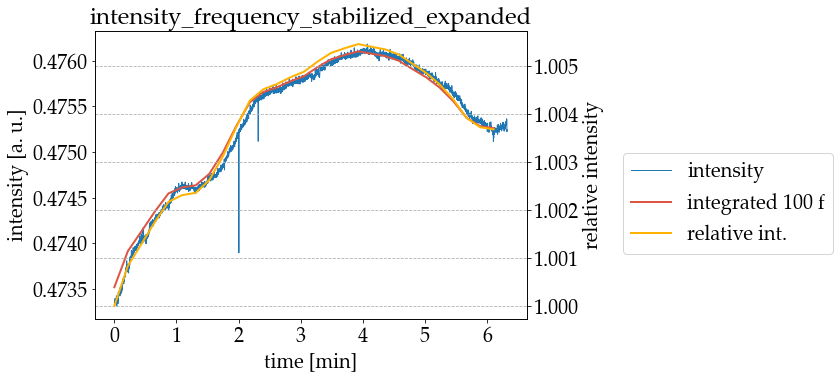

In [31]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
# axes.grid(linestyle='--')
axes.set_title(name)
axes.set_xlabel('time [min]')
axes.set_ylabel('intensity [a. u.]')

axes_rel = axes.twinx()
axes_rel.grid(linestyle='--')
axes_rel.set_ylabel('relative intensity')

for i in range(1, data.shape[1]):
    axes.plot(data[:,0], data[:,i], linewidth=1, label = 'intensity')
    axes.plot(data[::d,0], data_in, linewidth=2, label = 'integrated 100 f', color = red)
    axes_rel.plot(data[::d,0], data_in/data_in[0], linewidth=2, color = yellow, label = 'relative int.')
    
    

lgd = fig.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

fig.savefig(folder + name +'.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    
